<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Two-Point-DIXON" data-toc-modified-id="Two-Point-DIXON-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Two Point DIXON</a></span><ul class="toc-item"><li><span><a href="#Equation-of-2-Images" data-toc-modified-id="Equation-of-2-Images-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Equation of 2 Images</a></span></li><li><span><a href="#Fat-Water-Images-using-Equation-7-&amp;-8" data-toc-modified-id="Fat-Water-Images-using-Equation-7-&amp;-8-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fat-Water Images using Equation 7 &amp; 8</a></span><ul class="toc-item"><li><span><a href="#Determine-TE2" data-toc-modified-id="Determine-TE2-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Determine TE2</a></span></li><li><span><a href="#Calculating-Phi-not,-Equation-9" data-toc-modified-id="Calculating-Phi-not,-Equation-9-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Calculating Phi-not, Equation 9</a></span></li><li><span><a href="#Calculating-Phi,-Equation-10" data-toc-modified-id="Calculating-Phi,-Equation-10-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Calculating Phi, Equation 10</a></span></li><li><span><a href="#Image-at-TE2-with-Phi,-Equation-8" data-toc-modified-id="Image-at-TE2-with-Phi,-Equation-8-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Image at TE2 with Phi, Equation 8</a></span></li><li><span><a href="#Fat-Water-Images,-Equation-13" data-toc-modified-id="Fat-Water-Images,-Equation-13-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Fat-Water Images, Equation 13</a></span></li></ul></li><li><span><a href="#Fat-Water-Images-using-Equation-7,-TE1-=-3.0-ms-&amp;-TE2-=-3.25-ms" data-toc-modified-id="Fat-Water-Images-using-Equation-7,-TE1-=-3.0-ms-&amp;-TE2-=-3.25-ms-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fat-Water Images using Equation 7, TE1 = 3.0 ms &amp; TE2 = 3.25 ms</a></span></li><li><span><a href="#Image-with-TE-=-3.257ms-&amp;-TE=-3.571-ms" data-toc-modified-id="Image-with-TE-=-3.257ms-&amp;-TE=-3.571-ms-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Image with TE = 3.257ms &amp; TE= 3.571 ms</a></span></li><li><span><a href="#Image-with-TE-=-3.75ms-&amp;-TE-=-4ms" data-toc-modified-id="Image-with-TE-=-3.75ms-&amp;-TE-=-4ms-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Image with TE = 3.75ms &amp; TE = 4ms</a></span></li></ul></li></ul></div>

# Fat-Water Scans

In [3]:
# Modules
import pydicom as dcm
import math
import numpy as np
import matplotlib.pyplot as plt
import glob
from os.path import expanduser
import os

import matplotlib.pylab as plt
import numpy as np
import math
import plot as plot
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))
# Modules
from mpl_toolkits.axes_grid1 import ImageGrid
import ipywidgets as widgets
from ipywidgets import interact, interactive_output, HBox
from mpl_toolkits.axes_grid1 import make_axes_locatable

# load Bruker raw reader module
import brukerMRI_reader as bruker
# load modules
import pylab as plt
import numpy as np

In [4]:
# Select data to reconstruct
def recon_fat_water(exp_number):
    series = exp_number
    path = "/Users/admin/Desktop/brukerMRI-master/scans/w_p/"  # access to mapped MRT network dri
    Exp = bruker.ReadExperiment(path,series)

    # Full recon steps
    recopart = ['quadrature', 'phase_rotate', 'zero_filling', 'FT', 'cutoff']
    Exp.bruker_reco(recopart)

    return Exp.image

In [5]:
def perc_wf(img,water,fat):
    c = np.sum(np.abs(img))
    a = np.sum(np.abs(water))
    b = np.sum(np.abs(fat))
    perc_w = (a/c)*100
    perc_f = (b/c)*100
    print('Percentage of water in image is: ',perc_w,'%')
    print('Percentage of fat in image is: ',perc_f,'%')

In [6]:
def calc_t2(t1):
    n = t1*(f_fat-f_water)
    t2 = (n+0.5)/(f_fat-f_water)
    return t2

## Two Point DIXON

### Equation of 2 Images

The simplest approach uses only two images.
The basic assumption is that there are only two
components in the image, water and fat. If $m_w$ is
the image of the water component, and $m_f$ is the
image of the fat component, the combined image
at an echo time $T_E,i$ is

\begin{equation*}
m_i   = m_w + e^{-i\omega_fT_{E,i}}m_f
\tag{1}
\end{equation*}

where we have assumed, for convenience, that we
are exactly on the water resonance, so only the
lipid component precesses at $\omega_f$ .We choose $T_E,i$ so that

\begin{equation*}
\omega_fT_{E,i}= {0,\pi,mod (2\pi)}
\tag{2}
\end{equation*}

The two imgaes that result are

$$
\begin{align}
m_1   = m_w + m_f
\tag{3} \\
m_2   = m_w - m_f
\tag{4}
\end{align}
$$ 

We can then combine these to make images that contain only water, or only fat

$$
\begin{align}
m_w   = \frac12[m_1 + m_2]
\tag{5} \\
m_f   = \frac12[m_1 - m_2]
\tag{6}
\end{align}
$$

The problem with this approach is that there are
other factors that confound the decomposition.
The major factor is the off-resonance frequency
shift $w$ that produces phase errors. Another factor
is the $T_2$ decay of signal at increasing echo times.
For spin echoes, the decay may be kept constant by
changing the echo time by shifting the refocusing
pulse. In gradient-recalled acquisitions, $T_2$ decay
will be a concern.

Of these two factors, the problem of the offresonance
frequency $w$ is by far the most important.
The estimation and correction for $T{_2}{^*}$
degrades the separation between fat and water
slightly, but is of secondary concern. We will ignore
this effect here,primary concern here is correcting for the effect of
off-resonance frequency.

The two images that result are

$$
\begin{align}
m_1   = (m_w + m_f)e^{i\phi_0}
\tag{7} \\
m_2   = (m_w - m_f)e^{i(\phi_0+\phi)}
\tag{8}
\end{align}
$$

where

\begin{equation*}
\phi_0 = -\omega{T_{E,1}}
\tag{9}
\end{equation*}

and the phase due to the precession between two echoes is

\begin{equation*}
\phi = -\omega({T_{E,2} - T_{E,1}})
\tag{10}
\end{equation*}

### Fat-Water Images using Equation 7 & 8

Assuming the images assigned, follows Equation 7 & 8
\
Water at 4.7ppm. Main fat peaks ppm: 6.7, 1.718, 1.162, 0.863, 0.581.

$$
\begin{align}
m_1   = (m_w + m_f)e^{i\phi_0}
\tag{11} \\
m_2   = (m_w - m_f)e^{i\phi}e^{i\phi_0}
\tag{12}
\end{align}
$$ 

In [7]:
img_file = np.array([[10,2.606],
                      [13,3.257],
                      [17,3.571],
                      [18,4.4],
                      [19,3],
                      [20,3.25],
                      [27,3.75],
                      [23,4],
                      [29,4.6],
                      [31,5.2],
                      [32,6],
                      [33,6.6]])

In [8]:
f_fat = 6.7*400
f_water = 4.7*400
w_fat = 2*np.pi*f_fat
w_water = 2*np.pi*f_water

#### Determine TE2

In [11]:
te1_1 = 3.25
te2_1 = calc_t2(te1_1)
te2_1

3.250625

#### Calculating Phi-not, Equation 9

In [12]:
m1_7 = recon_fat_water(20)
m1_7 = m1_7.reshape([128,128])
phi_not = np.angle(m1_7)

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff


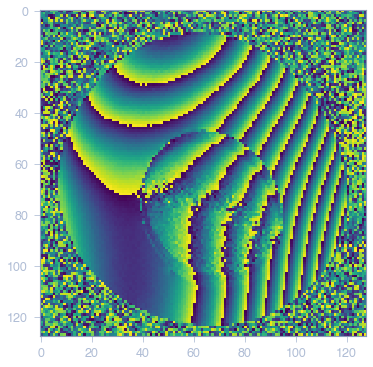

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(phi_not)

#### Calculating Phi, Equation 10

In [15]:
w_9 = phi_not/te1_1
phi = w_9*(te2_1-te1_1) 

#### Image at TE2 with Phi, Equation 8

In [16]:
#using equation 8
m2_8 = recon_fat_water(19)
m2_8 = m2_8.reshape([128,128])
m2_8_phi = m2_8*np.exp(1j*phi)

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff


The initial phase $\phi_0$ can be computed from $m_1$ and
eliminated from both terms, so we neglect it. The estimate 
$\hat{m}_w$ is then

$$
\begin{align}
\hat{m}_w   = \frac12(m_1 + m_2)
\tag{13}\\
            =\frac12[m_w(1 + e^{i\phi}) 
\tag{14}\\
                + m_f(1 - e^{i\phi})]
\tag{15}\\
\end{align}
$$

#### Fat-Water Images, Equation 13

In [17]:
m_w_hat_13 = 0.5*(np.abs(m1_7)+np.abs(m2_8_phi))

In [18]:
m_f_hat_13 = 0.5*(np.abs(m1_7)-np.abs(m2_8_phi))

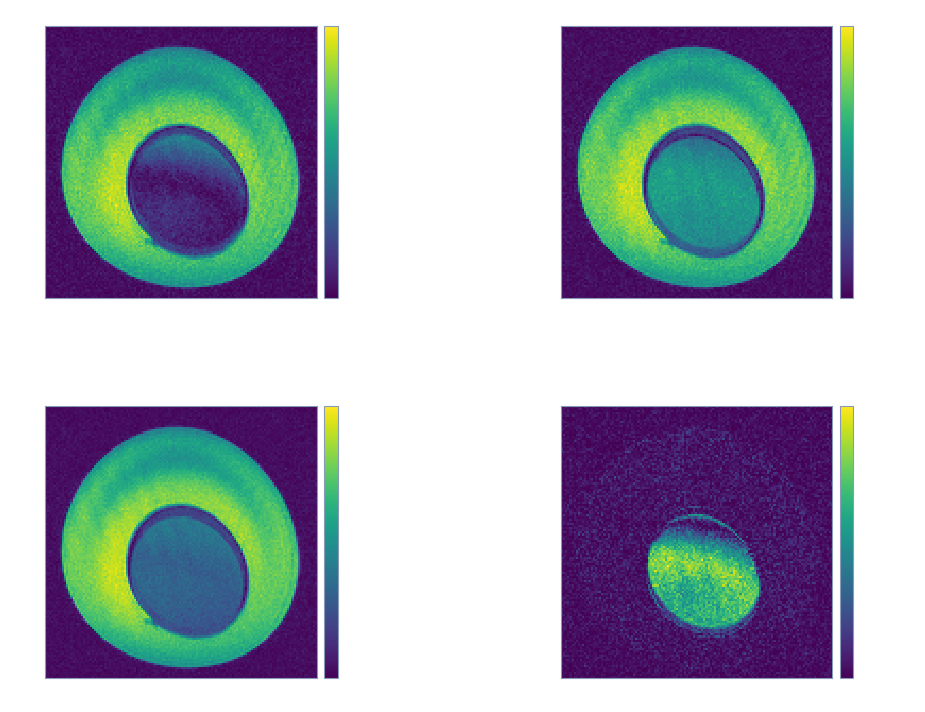

In [19]:
img1 = {'$T_{E,i} = 2.6s$':m1_7,
        '$T_{E,i} = 3s$':m2_8_phi,
        'Water estimate':m_w_hat_13,
        'Fat estimate': m_f_hat_13
        }
plot.comparison_i_plots(img1,15,12)

In [20]:
perc_wf(m1_7,m_w_hat_13,m_f_hat_13)

Percentage of water in image is:  107.39882234743179 %
Percentage of fat in image is:  11.052447774088549 %


In [21]:
# given main fat peak w_f = 2.0, 2.0ppm shift from exact water resonance, w_w = 0 ppm
# Water at 4.7ppm. Main fat peaks ppm: 6.7, 1.718, 1.162, 0.863, 0.581.
# to obtain equation (4) equation (2) must equal to pi
def PD2_7(te_1,te_2,img_te1,img_te2):

    m1_7 = recon_fat_water(img_te1)
    m1_7 = m1_7.reshape([128,128])
    phi_not = np.angle(m1_7)
    
    w_9 = phi_not/te_1
    phi = w_9*(te_2-te_1)
    
    #using equation 8
    m2_2 = recon_fat_water(img_te2)
    m2_2 = m2_2.reshape([128,128])
    m2_8= m2_2*np.exp(1j*phi)
    m_w_hat_13 = 0.5*(np.abs(m1_7)+np.abs(m2_8))
    m_f_hat_13 = 0.5*(np.abs(m1_7)-np.abs(m2_8))
    
    img = {'$T_{E,i}$ = ' + str(te_1) :m1_7,
        '$T_{E,i}$ = '+ str(te_2):m2_2,
        'Water estimate':m_w_hat_13,
        'Fat estimate': m_f_hat_13
        }
    plot.comparison_i_plots(img,15,12)
    return print(perc_wf(m1_7,m_w_hat_13,m_f_hat_13))

### Fat-Water Images using Equation 7, TE1 = 3.0 ms & TE2 = 3.25 ms

In [22]:
img_file

array([[10.   ,  2.606],
       [13.   ,  3.257],
       [17.   ,  3.571],
       [18.   ,  4.4  ],
       [19.   ,  3.   ],
       [20.   ,  3.25 ],
       [27.   ,  3.75 ],
       [23.   ,  4.   ],
       [29.   ,  4.6  ],
       [31.   ,  5.2  ],
       [32.   ,  6.   ],
       [33.   ,  6.6  ]])

In [24]:
te1_1 = 3
te2_1 = calc_t2(te1_1)
te2_1

3.000625

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
Percentage of water in image is:  93.55490056690789 %
Percentage of fat in image is:  9.627765276427379 %
None


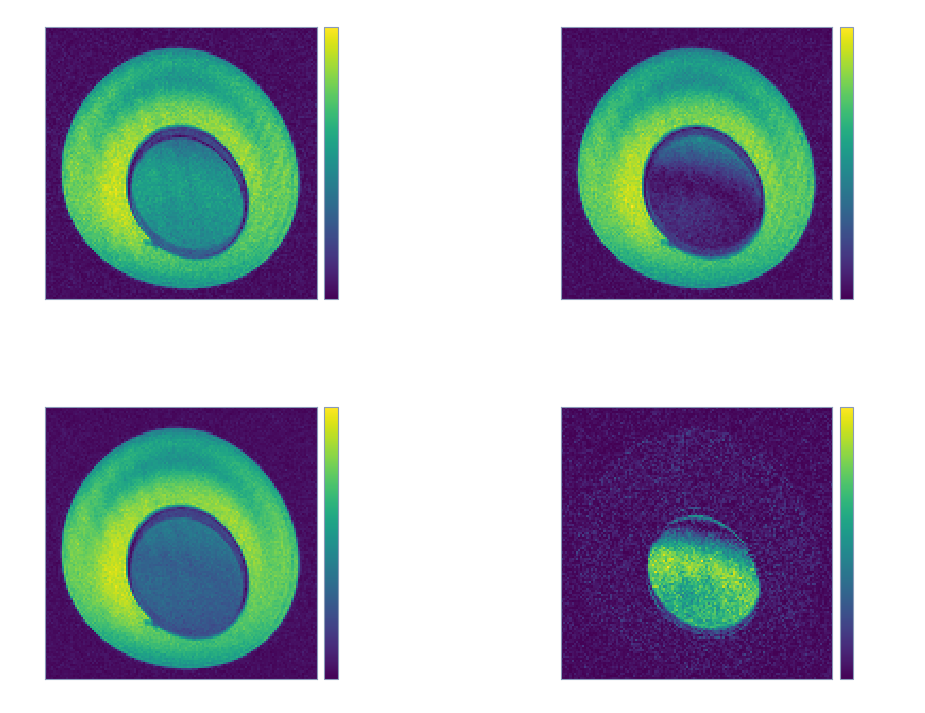

In [25]:
PD2_7(3,3.25,19,20)

### Image with TE = 3.257ms & TE= 3.571 ms

In [26]:
print(img_file)

[[10.     2.606]
 [13.     3.257]
 [17.     3.571]
 [18.     4.4  ]
 [19.     3.   ]
 [20.     3.25 ]
 [27.     3.75 ]
 [23.     4.   ]
 [29.     4.6  ]
 [31.     5.2  ]
 [32.     6.   ]
 [33.     6.6  ]]


In [27]:
te1_1 = 3.257
te2_1 = calc_t2(te1_1)
te2_1

3.257625

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
Percentage of water in image is:  99.30765194182365 %
Percentage of fat in image is:  6.200708514560881 %
None


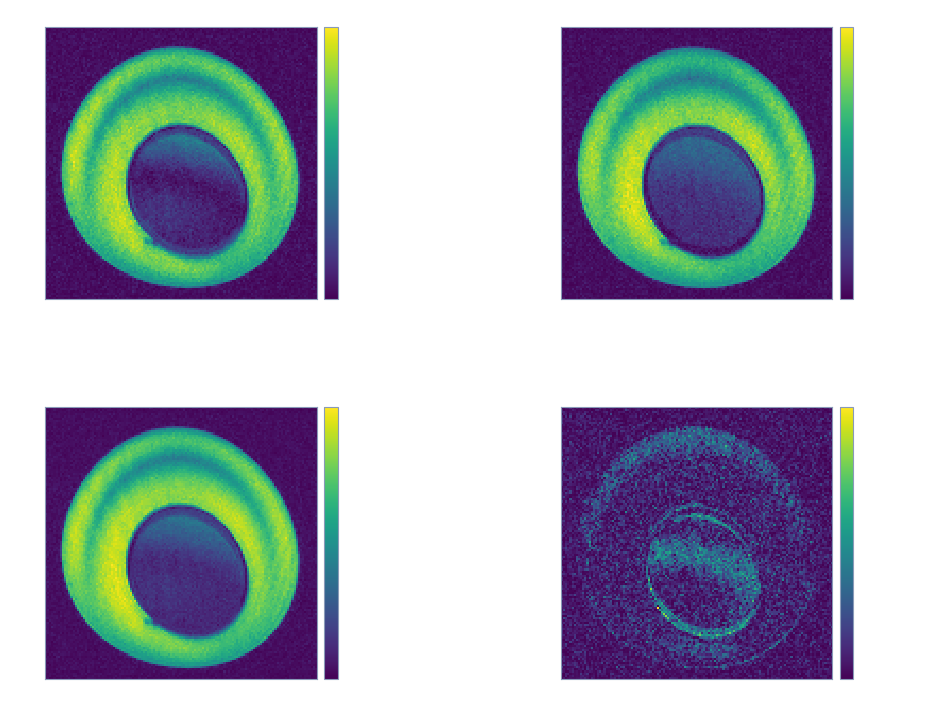

In [28]:
PD2_7(3.257,3.571,13,17)

### Image with TE = 3.75ms & TE = 4ms

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
Percentage of water in image is:  97.80020263714235 %
Percentage of fat in image is:  5.839159395424157 %
None


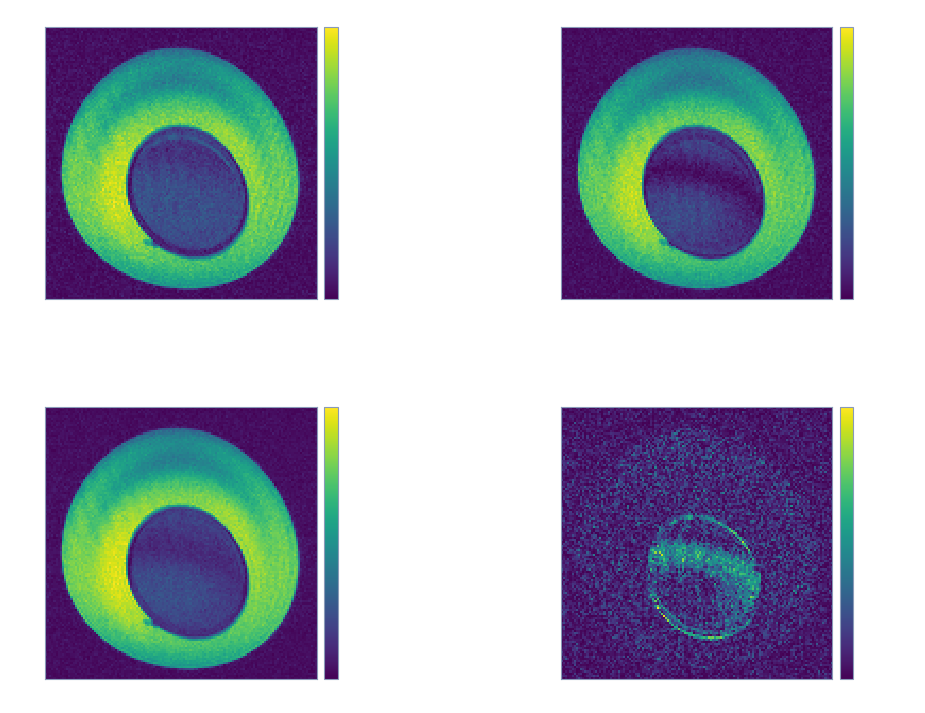

In [31]:
PD2_7(3.75,4,27,23)